# Import paczek początkowych

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import i wyświetlenie danych

In [2]:
df = pd.read_csv("zoo.csv", sep=";")
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,NaN,0,1,1,1.0,1,0,0.0,4.0,0,0,1,1
1,antelope,1,0,0,1,0.0,0,0,1,1.0,1,0,NaN,4.0,1,0,1,1
2,bass,0,0,1,0,0.0,1,1,1,1.0,0,0,1.0,0.0,1,0,0,4
3,bear,1,0,0,1,0.0,0,1,1,1.0,1,0,0.0,4.0,0,0,1,1
4,boar,1,0,0,1,0.0,NaN,1,1,1.0,1,0,0.0,4.0,1,0,1,1


# Wstępna analiza i przyjrzenie się danym

In [3]:
df.shape

(101, 18)

In [4]:
df.columns

Index(['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   animal_name  101 non-null    object 
 1   hair         101 non-null    int64  
 2   feathers     101 non-null    int64  
 3   eggs         101 non-null    int64  
 4   milk         101 non-null    object 
 5   airborne     100 non-null    float64
 6   aquatic      100 non-null    object 
 7   predator     101 non-null    int64  
 8   toothed      101 non-null    int64  
 9   backbone     81 non-null     float64
 10  breathes     101 non-null    int64  
 11  venomous     101 non-null    int64  
 12  fins         100 non-null    float64
 13  legs         80 non-null     float64
 14  tail         101 non-null    int64  
 15  domestic     101 non-null    object 
 16  catsize      101 non-null    int64  
 17  class_type   101 non-null    int64  
dtypes: float64(4), int64(10), object(4)
memory usage: 

In [6]:
df["animal_name"].unique()

array(['aardvark', 'antelope', 'bass', 'bear', 'boar', 'buffalo', 'calf',
       'carp', 'catfish', 'cavy', 'cheetah', 'chicken', 'chub', 'clam',
       'crab', 'crayfish', 'crow', 'deer', 'dogfish', 'dolphin', 'dove',
       'duck', 'elephant', 'flamingo', 'flea', 'frog', 'fruitbat',
       'giraffe', 'girl', 'gnat', 'goat', 'gorilla', 'gull', 'haddock',
       'hamster', 'hare', 'hawk', 'herring', 'honeybee', 'housefly',
       'kiwi', 'ladybird', 'lark', 'leopard', 'lion', 'lobster', 'lynx',
       'mink', 'mole', 'mongoose', 'moth', 'newt', 'octopus', 'opossum',
       'oryx', 'ostrich', 'parakeet', 'penguin', 'pheasant', 'pike',
       'piranha', 'pitviper', 'platypus', 'polecat', 'pony', 'porpoise',
       'puma', 'pussycat', 'raccoon', 'reindeer', 'rhea', 'scorpion',
       'seahorse', 'seal', 'sealion', 'seasnake', 'seawasp', 'skimmer',
       'skua', 'slowworm', 'slug', 'sole', 'sparrow', 'squirrel',
       'starfish', 'stingray', 'swan', 'termite', 'toad', 'tortoise',
       

In [7]:
df["animal_name"].unique().shape

(100,)

In [8]:
counted_names = df.groupby(["animal_name"])["animal_name"].count()
counted_names[counted_names==2]

animal_name
frog    2
Name: animal_name, dtype: int64

In [9]:
df[df["animal_name"] == "frog"]

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
25,frog,0,0,1,0,0.0,1,1,1,NaN,1,0,0.0,4.0,0,unknown,0,5
26,frog,0,0,1,0,0.0,1,1,1,1.0,1,1,0.0,4.0,0,unknown,0,5


In [10]:
for col in df.columns[1:-1]:
    print(col, df[col].unique())

hair [1 0]
feathers [0 1]
eggs [0 1]
milk ['1' '0' 'unknown']
airborne [nan  0.  1.]
aquatic ['0' '1' nan 'unknown']
predator [1 0]
toothed [1 0]
backbone [ 1. nan  0.]
breathes [1 0]
venomous [0 1]
fins [ 0. nan  1.]
legs [ 4.  0.  2.  6.  8. nan  5.]
tail [0 1]
domestic ['0' '1' 'unknown']
catsize [1 0]


Wszystkie boole, legs to ilość nóg.

In [11]:
df[df["legs"]==5]

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
85,starfish,0,0,1,0,0.0,1,1,0,0.0,0,0,0.0,5.0,0,0,0,7


To ciekawe

# Preprocessing

In [12]:
df.drop(labels=25, axis=0, inplace=True)
df[df["animal_name"] == "frog"]

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
26,frog,0,0,1,0,0.0,1,1,1,1.0,1,1,0.0,4.0,0,unknown,0,5


In [13]:
df.shape

(100, 18)

In [14]:
df.index = range(0, 100)

In [15]:
df.groupby(["milk"])["milk"].count()

milk
0          55
1          39
unknown     6
Name: milk, dtype: int64

In [16]:
df.groupby(["aquatic"])["aquatic"].count()

aquatic
0          60
1          33
unknown     6
Name: aquatic, dtype: int64

In [17]:
df.groupby(["domestic"])["domestic"].count()

domestic
0          77
1          11
unknown    12
Name: domestic, dtype: int64

In [18]:
df.replace("unknown", np.nan, inplace=True)

In [19]:
df.isna().sum()

animal_name     0
hair            0
feathers        0
eggs            0
milk            6
airborne        1
aquatic         7
predator        0
toothed         0
backbone       19
breathes        0
venomous        0
fins            1
legs           21
tail            0
domestic       12
catsize         0
class_type      0
dtype: int64

Zajrzymy do danych, zbiór nie jest duży, może uda mi sie uzupełnić NaN'y zgodnie z wiedzą i internetem hihi

In [20]:
df[df["milk"].isna()]

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
71,scorpion,0,0,0,NaN,0.0,0,1,0,0.0,1,1,0.0,NaN,1,0,0,7
72,seahorse,0,0,1,NaN,0.0,1,0,1,1.0,0,0,1.0,NaN,1,0,0,4
73,seal,1,0,0,NaN,0.0,1,1,1,1.0,1,0,1.0,NaN,0,0,1,1
74,sealion,1,0,0,NaN,0.0,1,1,1,1.0,1,0,1.0,NaN,1,0,1,1
75,seasnake,0,0,0,NaN,0.0,1,1,1,1.0,0,1,0.0,NaN,1,0,0,3
76,seawasp,0,0,1,NaN,0.0,1,1,0,0.0,0,1,0.0,NaN,0,0,0,7


In [21]:
df.loc[71, "milk"] = 0
df.loc[72, "milk"] = 0
df.loc[73, "milk"] = 1
df.loc[74, "milk"] = 1
df.loc[75, "milk"] = 0
df.loc[76, "milk"] = 0

In [22]:
df[df["airborne"].isna()]

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,NaN,0,1,1,1.0,1,0,0.0,4.0,0,0,1,1


In [23]:
df.loc[0, "airborne"] = 0.0

In [24]:

df[df["aquatic"].isna()]

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
4,boar,1,0,0,1,0.0,NaN,1,1,1.0,1,0,0.0,4.0,1,0,1,1
28,girl,1,0,0,1,0.0,NaN,1,1,1.0,1,0,0.0,2.0,0,NaN,1,1
29,gnat,0,0,1,0,1.0,NaN,0,0,0.0,1,0,0.0,6.0,0,NaN,0,6
30,goat,1,0,0,1,0.0,NaN,0,1,1.0,1,0,0.0,4.0,1,1,1,1
31,gorilla,1,0,0,1,0.0,NaN,0,1,1.0,1,0,0.0,2.0,0,0,1,1
32,gull,0,1,1,0,1.0,NaN,1,0,1.0,1,0,0.0,2.0,1,0,0,2
33,haddock,0,0,1,0,0.0,NaN,0,1,1.0,0,0,1.0,0.0,1,0,0,4


In [25]:
df.loc[4, "aquatic"] = 0
df.loc[28, "aquatic"] = 0
df.loc[29, "aquatic"] = 0
df.loc[30, "aquatic"] = 0
df.loc[31, "aquatic"] = 0
df.loc[32, "aquatic"] = 0
df.loc[33, "aquatic"] = 1

In [26]:
df[df["backbone"].isna()]

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
6,calf,1,0,0,1,0.0,0,0,1,NaN,1,0,0.0,4.0,1,1,1,1
7,carp,0,0,1,0,0.0,1,0,1,NaN,0,0,1.0,0.0,1,1,0,4
8,catfish,0,0,1,0,0.0,1,1,1,NaN,0,0,1.0,0.0,1,0,0,4
9,cavy,1,0,0,1,0.0,0,0,1,NaN,1,0,0.0,4.0,0,1,0,1
10,cheetah,1,0,0,1,0.0,0,1,1,NaN,1,0,0.0,4.0,1,0,1,1
11,chicken,0,1,1,0,1.0,0,0,0,NaN,1,0,0.0,2.0,1,1,0,2
12,chub,0,0,1,0,0.0,1,1,1,NaN,0,0,1.0,0.0,1,0,0,4
13,clam,0,0,1,0,0.0,0,1,0,NaN,0,0,0.0,0.0,0,0,0,7
14,crab,0,0,1,0,0.0,1,1,0,NaN,0,0,0.0,4.0,0,0,0,7
15,crayfish,0,0,1,0,0.0,1,1,0,NaN,0,0,0.0,6.0,0,0,0,7


In [27]:
df.loc[6, "backbone"] = 1
df.loc[7, "backbone"] = 1
df.loc[8, "backbone"] = 1
df.loc[9, "backbone"] = 1
df.loc[10, "backbone"] = 1
df.loc[11, "backbone"] = 1
df.loc[12, "backbone"] = 1
df.loc[13, "backbone"] = 0
df.loc[14, "backbone"] = 0
df.loc[15, "backbone"] = 0
df.loc[16, "backbone"] = 1
df.loc[17, "backbone"] = 1
df.loc[18, "backbone"] = 1
df.loc[19, "backbone"] = 1
df.loc[20, "backbone"] = 1
df.loc[21, "backbone"] = 1
df.loc[22, "backbone"] = 1
df.loc[23, "backbone"] = 1
df.loc[24, "backbone"] = 0

In [28]:
df[df["fins"].isna()]

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
1,antelope,1,0,0,1,0.0,0,0,1,1.0,1,0,NaN,4.0,1,0,1,1


In [29]:
df.loc[1, "fins"] = 0

In [30]:
df[df["legs"].isna()]

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
59,pike,0,0,1,0,0.0,1,1,1,1.0,0,0,1.0,NaN,1,0,1,4
60,piranha,0,0,1,0,0.0,1,1,1,1.0,0,0,1.0,NaN,1,0,0,4
61,pitviper,0,0,1,0,0.0,0,1,1,1.0,1,1,0.0,NaN,1,0,0,3
62,platypus,1,0,1,1,0.0,1,1,0,1.0,1,0,0.0,NaN,1,0,1,1
63,polecat,1,0,0,1,0.0,0,1,1,1.0,1,0,0.0,NaN,1,0,1,1
64,pony,1,0,0,1,0.0,0,0,1,1.0,1,0,0.0,NaN,1,1,1,1
65,porpoise,0,0,0,1,0.0,1,1,1,1.0,1,0,1.0,NaN,1,0,1,1
66,puma,1,0,0,1,0.0,0,1,1,1.0,1,0,0.0,NaN,1,0,1,1
67,pussycat,1,0,0,1,0.0,0,1,1,1.0,1,0,0.0,NaN,1,1,1,1
68,raccoon,1,0,0,1,0.0,0,1,1,1.0,1,0,0.0,NaN,1,0,1,1


In [31]:
df.loc[59, "legs"] = 0.
df.loc[60, "legs"] = 0.
df.loc[61, "legs"] = 0.
df.loc[62, "legs"] = 4.
df.loc[63, "legs"] = 4.
df.loc[64, "legs"] = 4.
df.loc[65, "legs"] = 0.
df.loc[66, "legs"] = 4.
df.loc[67, "legs"] = 4.
df.loc[68, "legs"] = 4.
df.loc[69, "legs"] = 4.
df.loc[70, "legs"] = 2.
df.loc[71, "legs"] = 6.
df.loc[72, "legs"] = 0.
df.loc[73, "legs"] = 0.
df.loc[74, "legs"] = 0.
df.loc[75, "legs"] = 0.
df.loc[76, "legs"] = 0.
df.loc[77, "legs"] = 2.
df.loc[78, "legs"] = 2.
df.loc[79, "legs"] = 0.

In [32]:
df[df["domestic"].isna()]

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
18,dogfish,0,0,1,0,0.0,1,1,1,1.0,0,0,1.0,0.0,1,NaN,1,4
19,dolphin,0,0,0,1,0.0,1,1,1,1.0,1,0,1.0,0.0,1,NaN,1,1
20,dove,0,1,1,0,1.0,0,0,0,1.0,1,0,0.0,2.0,1,NaN,0,2
21,duck,0,1,1,0,1.0,1,0,0,1.0,1,0,0.0,2.0,1,NaN,0,2
22,elephant,1,0,0,1,0.0,0,0,1,1.0,1,0,0.0,4.0,1,NaN,1,1
23,flamingo,0,1,1,0,1.0,0,0,0,1.0,1,0,0.0,2.0,1,NaN,1,2
24,flea,0,0,1,0,0.0,0,0,0,0.0,1,0,0.0,6.0,0,NaN,0,6
25,frog,0,0,1,0,0.0,1,1,1,1.0,1,1,0.0,4.0,0,NaN,0,5
26,fruitbat,1,0,0,1,1.0,0,0,1,1.0,1,0,0.0,2.0,1,NaN,0,1
27,giraffe,1,0,0,1,0.0,0,0,1,1.0,1,0,0.0,4.0,1,NaN,1,1


In [33]:
df.loc[18, "domestic"] = 0
df.loc[19, "domestic"] = 0
df.loc[20, "domestic"] = 0
df.loc[21, "domestic"] = 0
df.loc[22, "domestic"] = 0
df.loc[23, "domestic"] = 0
df.loc[24, "domestic"] = 0
df.loc[25, "domestic"] = 0
df.loc[26, "domestic"] = 0
df.loc[27, "domestic"] = 0
df.loc[28, "domestic"] = 1
df.loc[29, "domestic"] = 0

In [34]:
df.isna().sum()

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64

In [35]:
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0.0,0,1,1,1.0,1,0,0.0,4.0,0,0,1,1
1,antelope,1,0,0,1,0.0,0,0,1,1.0,1,0,0.0,4.0,1,0,1,1
2,bass,0,0,1,0,0.0,1,1,1,1.0,0,0,1.0,0.0,1,0,0,4
3,bear,1,0,0,1,0.0,0,1,1,1.0,1,0,0.0,4.0,0,0,1,1
4,boar,1,0,0,1,0.0,0,1,1,1.0,1,0,0.0,4.0,1,0,1,1


In [36]:
# df["legs"].unique()

In [37]:
# legs_vect = np.zeros((100, 6))

In [38]:
# mapper={0: 0,
#         2: 1,
#         4: 2,
#         5: 3,
#         6: 4,
#         8: 5}

In [39]:
# for i in range(df.shape[0]):
#     # legs_vect[i, mapper[(int(df.iloc[i, 13]))]] += 1

In [40]:
# legs_vect

In [41]:
# legs_vect = pd.DataFrame(legs_vect, columns=[str(n)+"legs"
#                                              for n in list(mapper.keys())])

# legs_vect.head()

In [42]:
# tmp = df["class_type"]

In [43]:
# df.drop(["class_type"], axis=1, inplace=True)
# df.drop(["legs"], axis=1, inplace=True)

In [44]:
# df = df.join(legs_vect)
# df = df.join(tmp)
# df.head()

In [45]:
# df.columns

In [46]:
cols2conv_int = [col
                 for col in df.columns
                 if col != "animal_name"]

df[cols2conv_int] = df[cols2conv_int].astype(int)

cols2conv_bool = [col
                  for col in df.columns
                  if col not in ["animal_name", "legs", "class_type"]]

df[cols2conv_bool] = df[cols2conv_bool].astype(bool)

In [47]:
df.dtypes

animal_name    object
hair             bool
feathers         bool
eggs             bool
milk             bool
airborne         bool
aquatic          bool
predator         bool
toothed          bool
backbone         bool
breathes         bool
venomous         bool
fins             bool
legs            int64
tail             bool
domestic         bool
catsize          bool
class_type      int64
dtype: object

In [48]:
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,1
1,antelope,True,False,False,True,False,False,False,True,True,True,False,False,4,True,False,True,1
2,bass,False,False,True,False,False,True,True,True,True,False,False,True,0,True,False,False,4
3,bear,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,1
4,boar,True,False,False,True,False,False,True,True,True,True,False,False,4,True,False,True,1


In [49]:
classes_n = df.groupby(["class_type"])["class_type"].count()
classes_n

class_type
1    41
2    20
3     5
4    13
5     3
6     8
7    10
Name: class_type, dtype: int64

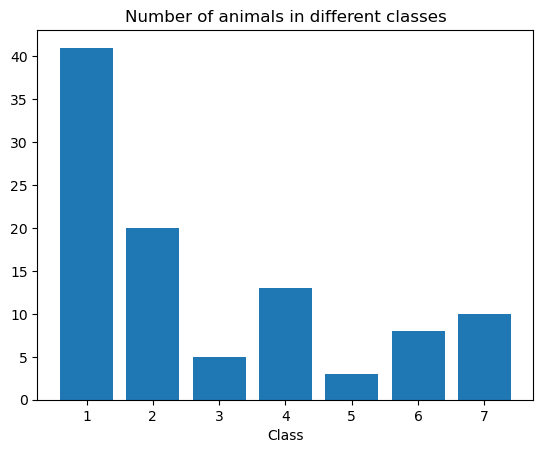

In [50]:
plt.bar(range(1, 8), height=classes_n)
plt.title("Number of animals in different classes")
plt.xlabel("Class")
plt.show()

In [51]:
corr_matrix = round(df.iloc[:, :-1].corr(), 2)

In [52]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15,10)})

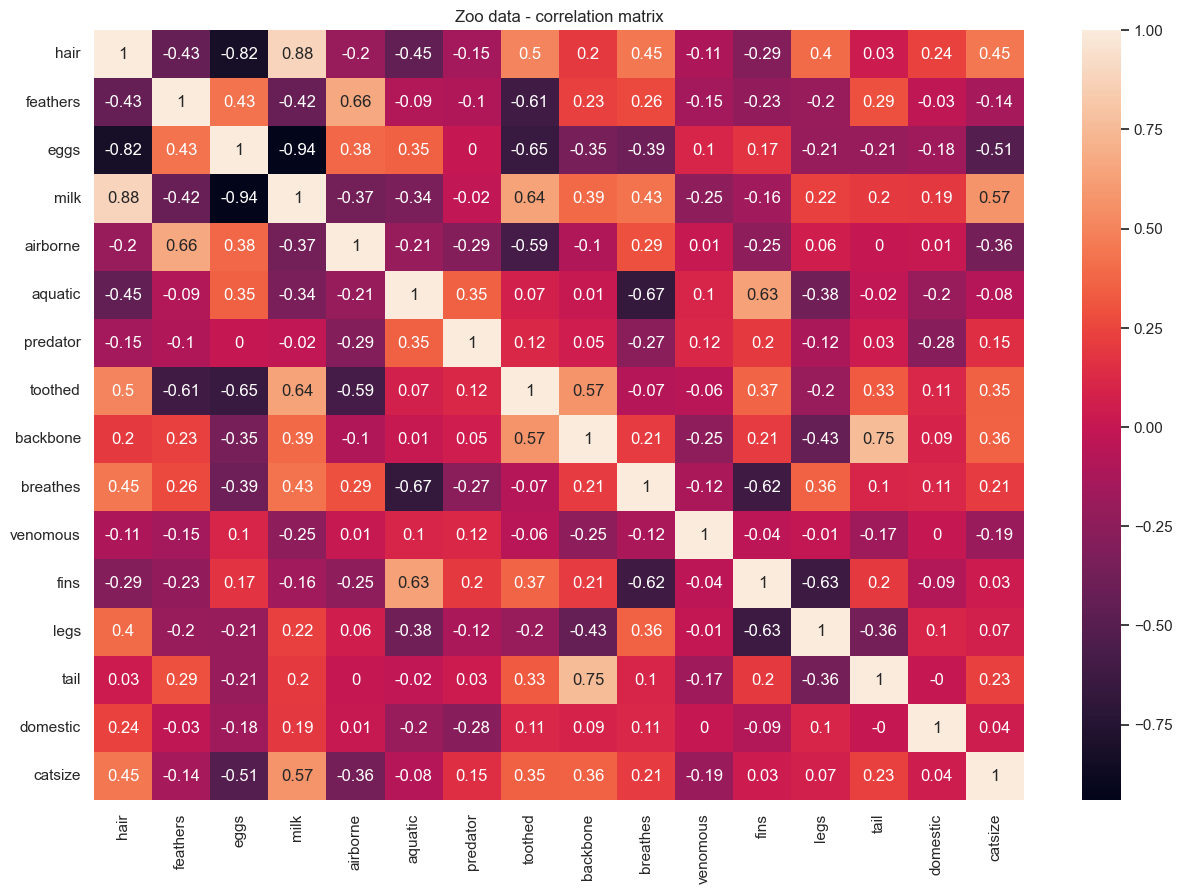

In [53]:
sns.heatmap(corr_matrix, annot=True)
plt.title("Zoo data - correlation matrix")
plt.show()

In [54]:
X = df.iloc[:, 1:-1]
y = np.array(df["class_type"])

In [55]:
X = (X - X.mean() ) / X.std()

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2023)

# Unsupervised

# 1. K-Means

In [58]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [59]:
sil_scores = []

for k in range(2, 11):

    model = KMeans(n_clusters=k, n_init='auto',random_state=2023).fit(X)
    y_pred = model.labels_
    sil_scores.append(silhouette_score(X, y_pred))

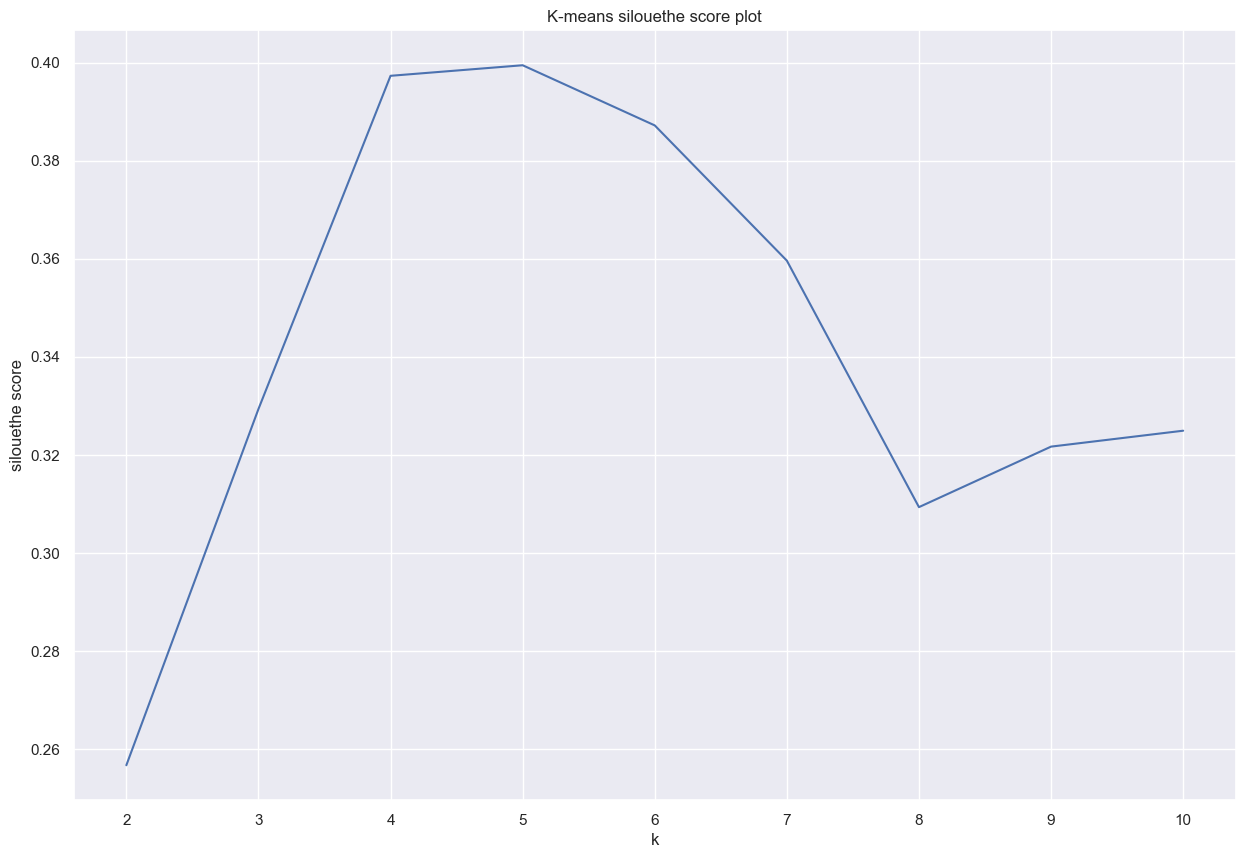

In [60]:
plt.plot(range(2,11), sil_scores)
plt.title("K-means silouethe score plot")
plt.xlabel("k")
plt.ylabel("silouethe score")
plt.show()

Z jakiegoś powodu wygrywa k=5

Sprawdzmy zatem jakie klastry daje arbitralne 5 klastrow.

In [61]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

In [62]:
model = KMeans(n_clusters=5, n_init="auto", random_state=2023).fit(X)

In [63]:
kmeans = {x: list(df[model.labels_ == x]["animal_name"])
          for x in range (0, 5)}

kmeans

{0: ['flea',
  'gnat',
  'honeybee',
  'housefly',
  'ladybird',
  'moth',
  'scorpion',
  'slug',
  'termite',
  'toad',
  'wasp',
  'worm'],
 1: ['aardvark',
  'antelope',
  'bear',
  'boar',
  'buffalo',
  'calf',
  'cavy',
  'cheetah',
  'deer',
  'elephant',
  'fruitbat',
  'giraffe',
  'girl',
  'goat',
  'gorilla',
  'hamster',
  'hare',
  'leopard',
  'lion',
  'lynx',
  'mink',
  'mole',
  'mongoose',
  'opossum',
  'oryx',
  'platypus',
  'polecat',
  'pony',
  'puma',
  'pussycat',
  'raccoon',
  'reindeer',
  'seal',
  'sealion',
  'squirrel',
  'tuatara',
  'vampire',
  'vole',
  'wallaby',
  'wolf'],
 2: ['chicken',
  'crow',
  'dove',
  'duck',
  'flamingo',
  'gull',
  'hawk',
  'kiwi',
  'lark',
  'ostrich',
  'parakeet',
  'penguin',
  'pheasant',
  'rhea',
  'skimmer',
  'skua',
  'sparrow',
  'swan',
  'tortoise',
  'vulture',
  'wren'],
 3: ['bass',
  'carp',
  'catfish',
  'chub',
  'dogfish',
  'dolphin',
  'haddock',
  'herring',
  'newt',
  'pike',
  'piranha',

a teraz sprobujmy 7

In [64]:
model_kmeans = KMeans(n_clusters=7, n_init="auto", random_state=2023).fit(X)

In [65]:
kmeans = {x: list(df[model_kmeans.labels_ == x]["animal_name"])
          for x in range (0, 7)}

kmeans

{0: ['flea',
  'scorpion',
  'slug',
  'termite',
  'toad',
  'tortoise',
  'tuatara',
  'worm'],
 1: ['aardvark',
  'antelope',
  'bear',
  'boar',
  'buffalo',
  'cheetah',
  'deer',
  'elephant',
  'fruitbat',
  'giraffe',
  'gorilla',
  'hare',
  'leopard',
  'lion',
  'lynx',
  'mink',
  'mole',
  'mongoose',
  'opossum',
  'oryx',
  'platypus',
  'polecat',
  'puma',
  'raccoon',
  'seal',
  'sealion',
  'squirrel',
  'vampire',
  'vole',
  'wallaby',
  'wolf'],
 2: ['chicken',
  'crow',
  'dove',
  'duck',
  'flamingo',
  'gull',
  'hawk',
  'kiwi',
  'lark',
  'ostrich',
  'parakeet',
  'penguin',
  'pheasant',
  'rhea',
  'skimmer',
  'skua',
  'sparrow',
  'swan',
  'vulture',
  'wren'],
 3: ['bass',
  'carp',
  'catfish',
  'chub',
  'dogfish',
  'dolphin',
  'haddock',
  'herring',
  'newt',
  'pike',
  'piranha',
  'pitviper',
  'porpoise',
  'seahorse',
  'seasnake',
  'slowworm',
  'sole',
  'stingray',
  'tuna'],
 4: ['clam',
  'crab',
  'crayfish',
  'frog',
  'lobster

In [66]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

In [67]:
adjusted_rand_score(model_kmeans.labels_, np.array(df["class_type"]))

0.7066675590005049

In [68]:
normalized_mutual_info_score(model_kmeans.labels_, np.array(df["class_type"]))

0.7758757855872928

not bad

In [69]:
from sklearn.cluster import AgglomerativeClustering

In [70]:
model_agg = AgglomerativeClustering(n_clusters=7).fit(X)

In [71]:
adjusted_rand_score(model_agg.labels_, np.array(df["class_type"]))

0.6440569257965707

In [72]:
normalized_mutual_info_score(model_agg.labels_, np.array(df["class_type"]))

0.7670905800680605

In [73]:
agglomerative = {x: list(df[model_agg.labels_ == x]["animal_name"])
          for x in range (0, 7)}

agglomerative

{0: ['clam',
  'crab',
  'crayfish',
  'flea',
  'gnat',
  'honeybee',
  'housefly',
  'ladybird',
  'lobster',
  'moth',
  'octopus',
  'scorpion',
  'slug',
  'starfish',
  'termite',
  'wasp',
  'worm'],
 1: ['chicken',
  'crow',
  'dove',
  'duck',
  'flamingo',
  'gull',
  'hawk',
  'kiwi',
  'lark',
  'newt',
  'ostrich',
  'parakeet',
  'penguin',
  'pheasant',
  'rhea',
  'skimmer',
  'skua',
  'slowworm',
  'sparrow',
  'swan',
  'toad',
  'tortoise',
  'tuatara',
  'vulture',
  'wren'],
 2: ['bass',
  'carp',
  'catfish',
  'chub',
  'dogfish',
  'haddock',
  'herring',
  'pike',
  'piranha',
  'seahorse',
  'sole',
  'tuna'],
 3: ['aardvark',
  'antelope',
  'bear',
  'boar',
  'buffalo',
  'cheetah',
  'deer',
  'elephant',
  'fruitbat',
  'giraffe',
  'gorilla',
  'hare',
  'leopard',
  'lion',
  'lynx',
  'mink',
  'mole',
  'mongoose',
  'opossum',
  'oryx',
  'platypus',
  'polecat',
  'puma',
  'raccoon',
  'squirrel',
  'vampire',
  'vole',
  'wallaby',
  'wolf'],
 4:

In [74]:
from sklearn.cluster import DBSCAN

In [75]:
dbscan = DBSCAN(eps=2.5, min_samples=5).fit(X)


In [76]:
dbs = {x: list(df[dbscan.labels_ == x]["animal_name"])
          for x in range (0, 7)}

dbs

{0: ['aardvark',
  'antelope',
  'bear',
  'boar',
  'buffalo',
  'cheetah',
  'deer',
  'elephant',
  'fruitbat',
  'giraffe',
  'gorilla',
  'hare',
  'leopard',
  'lion',
  'lynx',
  'mink',
  'mole',
  'mongoose',
  'opossum',
  'oryx',
  'polecat',
  'puma',
  'raccoon',
  'squirrel',
  'vampire',
  'vole',
  'wallaby',
  'wolf'],
 1: ['bass',
  'catfish',
  'chub',
  'dogfish',
  'haddock',
  'herring',
  'pike',
  'piranha',
  'seahorse',
  'sole',
  'tuna'],
 2: ['calf', 'cavy', 'goat', 'hamster', 'pony', 'pussycat', 'reindeer'],
 3: ['crab', 'crayfish', 'lobster', 'octopus', 'starfish'],
 4: ['crow',
  'dove',
  'duck',
  'flamingo',
  'gull',
  'hawk',
  'kiwi',
  'lark',
  'ostrich',
  'penguin',
  'pheasant',
  'rhea',
  'skimmer',
  'skua',
  'sparrow',
  'swan',
  'vulture',
  'wren'],
 5: ['flea', 'gnat', 'housefly', 'ladybird', 'moth', 'termite'],
 6: []}

Wnioski: Te klastrowania są nawet niezłe. Wiadomo, że z takich danych nie dostaniemy 100% super podziału na Ssaki, Bezkręgowce, Owady etc. bez większego nakładu pracy czy dłuższej paratrymetyzacji modeli.
Niemniej każde grupowanie wyznaczyło jakieś sensowne boundaries, są owado-podobne, czworonogi z mlekiem, ptaki, wodne bezkręgowce. Jest gicik

# Supervised

# 1. KNN

In [77]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [78]:
acc_scores = []
for k in range(3, 26):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc_scores.append(accuracy_score(y_test, y_pred))

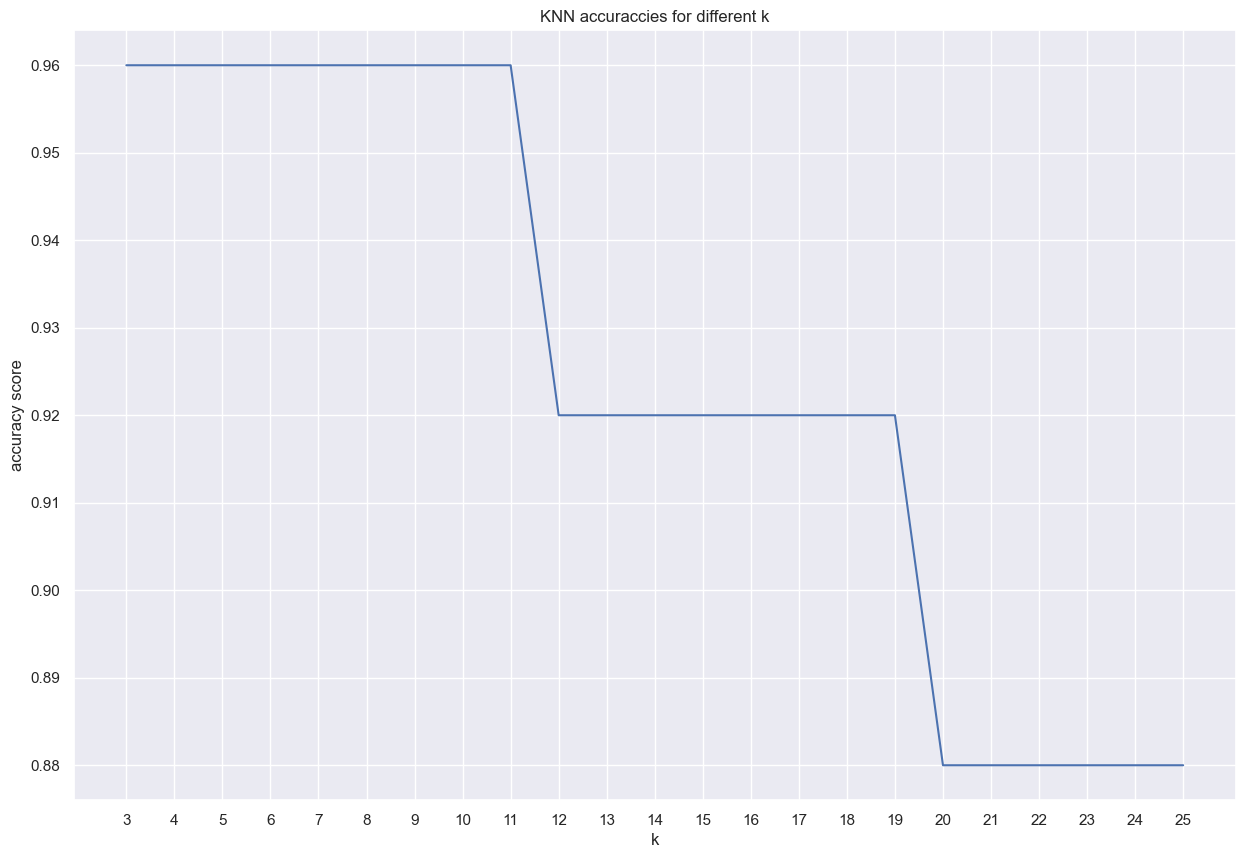

In [79]:
plt.plot(range(3, 26), acc_scores)
plt.xticks(range(3, 26))
plt.title("KNN accuraccies for different k")
plt.xlabel("k")
plt.ylabel("accuracy score")
plt.show()

In [80]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
X_test[y_pred != y_test]

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
89,-0.8642,-0.497494,0.846697,-0.829437,-0.559135,-0.714143,-1.1,-1.218606,0.466173,0.512996,-0.293406,-0.450301,0.600028,0.574456,-0.367423,1.122497


In [81]:
from sklearn.tree import DecisionTreeClassifier

In [82]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.96

In [83]:
X_test[y_pred != y_test]

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
89,-0.8642,-0.497494,0.846697,-0.829437,-0.559135,-0.714143,-1.1,-1.218606,0.466173,0.512996,-0.293406,-0.450301,0.600028,0.574456,-0.367423,1.122497


In [84]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

In [86]:
X_test[y_pred != y_test]

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize


In [87]:
df.iloc[89]

animal_name    tortoise
hair              False
feathers          False
eggs               True
milk              False
airborne          False
aquatic           False
predator          False
toothed           False
backbone           True
breathes           True
venomous          False
fins              False
legs                  4
tail               True
domestic          False
catsize            True
class_type            3
Name: 89, dtype: object

Biedny żuwik, nie mogą go skategoryzowac

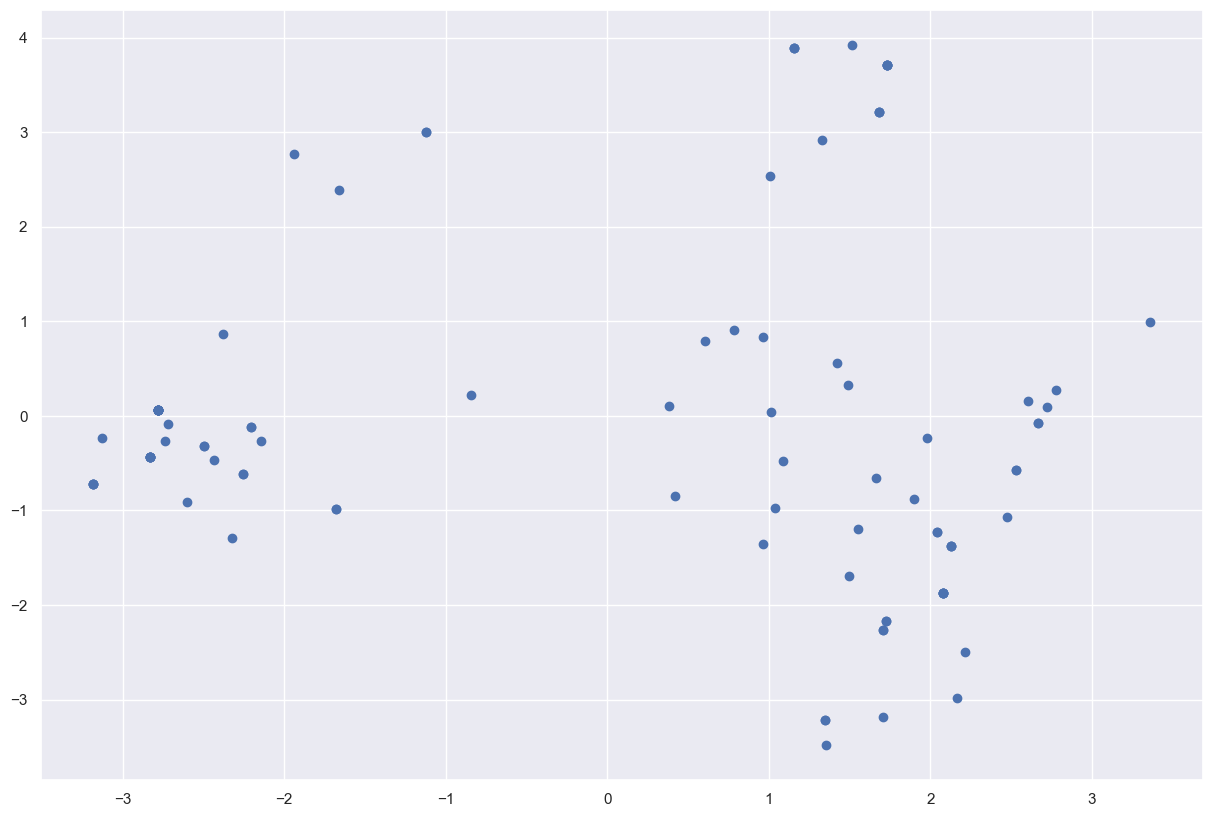

In [88]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1])

In [89]:
xd = KMeans(n_clusters=7, n_init="auto", random_state=2023).fit(X_pca)

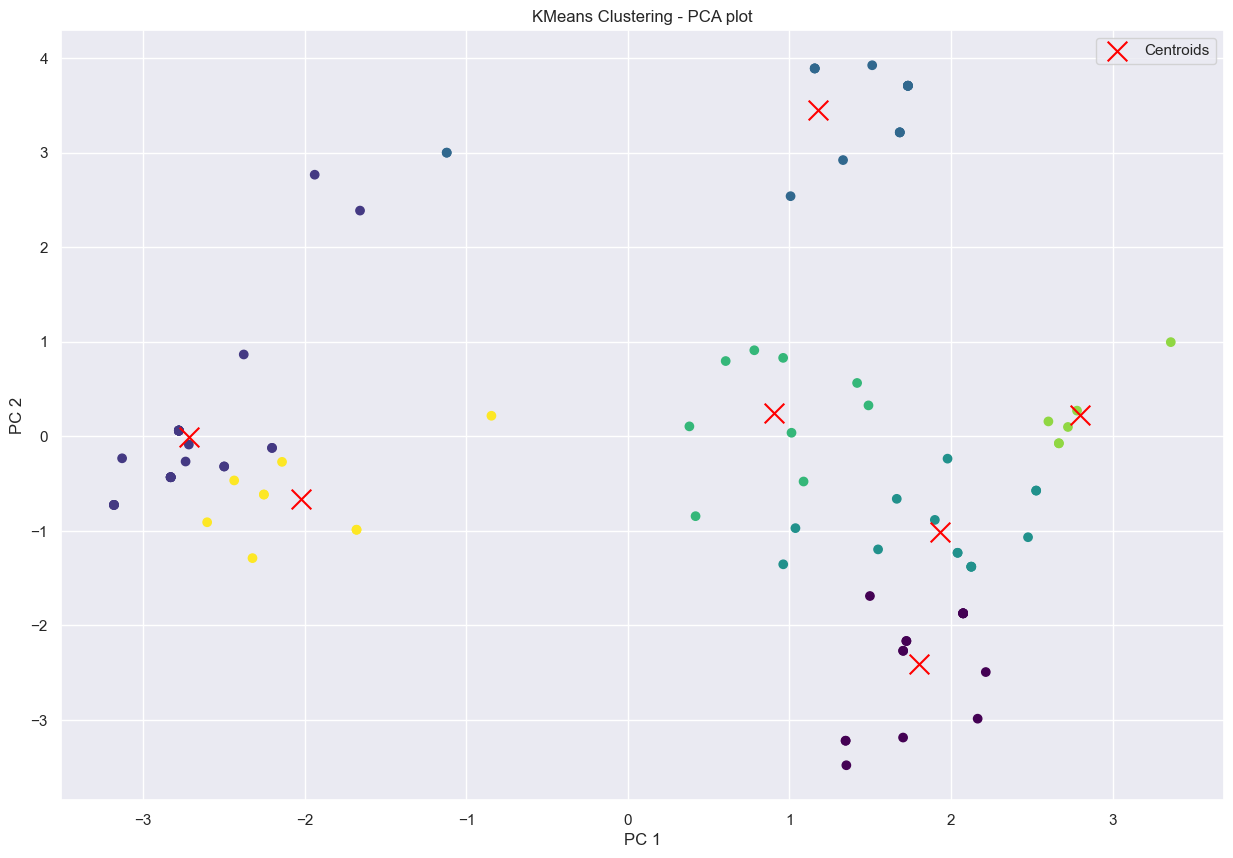

In [90]:
labels = xd.labels_
# Pobranie współrzędnych środków klastrów
centroids = xd.cluster_centers_

# Rysowanie wykresu punktowego
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red', s=200, label='Centroids')
plt.title('KMeans Clustering - PCA plot')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()
plt.show()